In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pathlib
data_dir = pathlib.Path("/home/snekha/datasets/100.csv")
# data_dire = pathlib.Path("/home/snekha/datasets/dno.csv")

In [494]:
data=pd.read_csv(data_dir)
# data2=pd.read_csv(data_dire)

In [495]:
# data= pd.concat([data1,data2],ignore_index=True)

In [496]:
data.head()


,first_name,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,Result
0,Angie,2,1,2,0,2,0,0,2,1,0,1,2,1
1,Hilarius,0,2,0,2,0,2,0,2,1,0,1,2,0
2,Stefan,0,2,2,1,2,2,0,2,1,2,0,2,1
3,Tedman,1,0,2,2,0,2,0,1,1,2,1,0,0
4,Pru,0,0,0,2,1,2,1,1,0,0,0,2,0


In [497]:
data.shape

(99, 14)

In [498]:
data.tail()

,first_name,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,Result
94,Grannie,1,1,2,2,0,1,1,2,1,0,1,2,0
95,Blanche,1,0,2,2,2,0,1,0,1,0,2,2,0
96,Robinia,1,1,1,2,2,2,0,1,1,2,2,0,0
97,Smith,1,2,2,1,1,1,0,0,0,1,0,0,0
98,Mack,2,1,2,0,2,1,1,0,2,1,2,1,0


In [499]:
data.columns

Index(['first_name', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9',
       'q10', 'q11', 'q12', 'Result'],
      dtype='object')

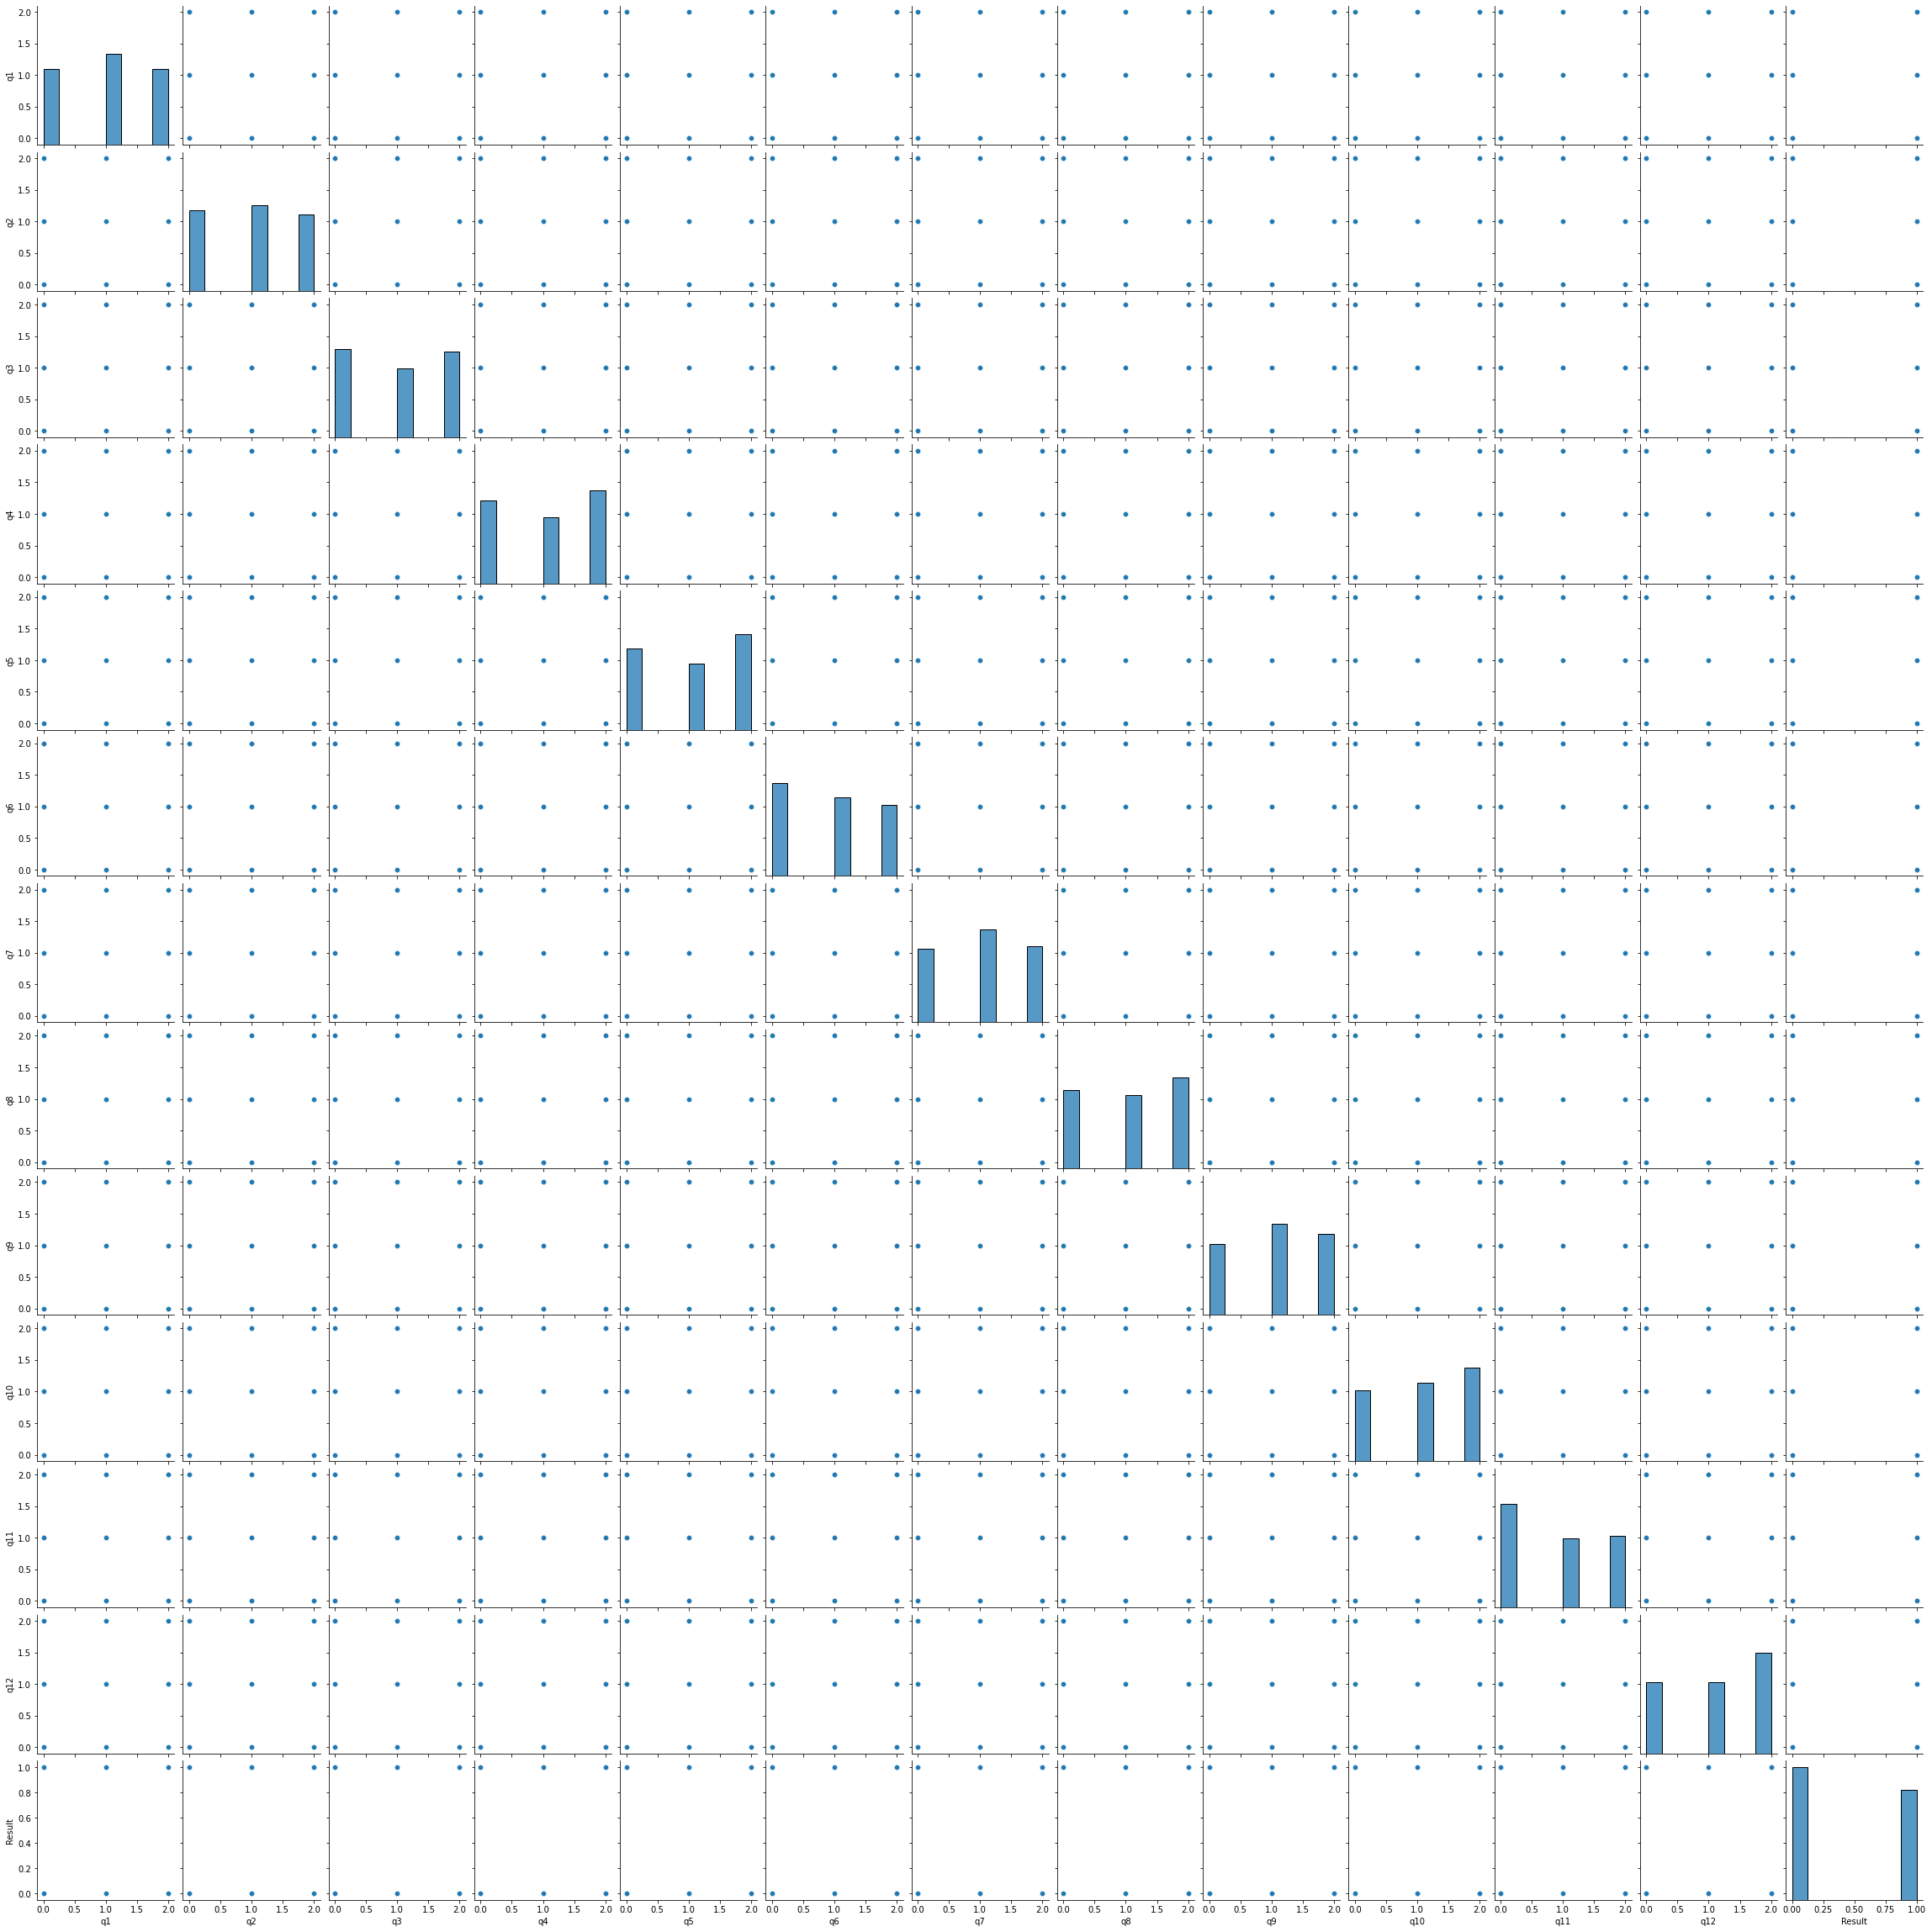

In [500]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, vars = ['q1', 'q2', 'q3', 'q4',
       'q5','q6', 'q7', 'q8', 'q9','q10', 'q11', 'q12', 'Result',] )

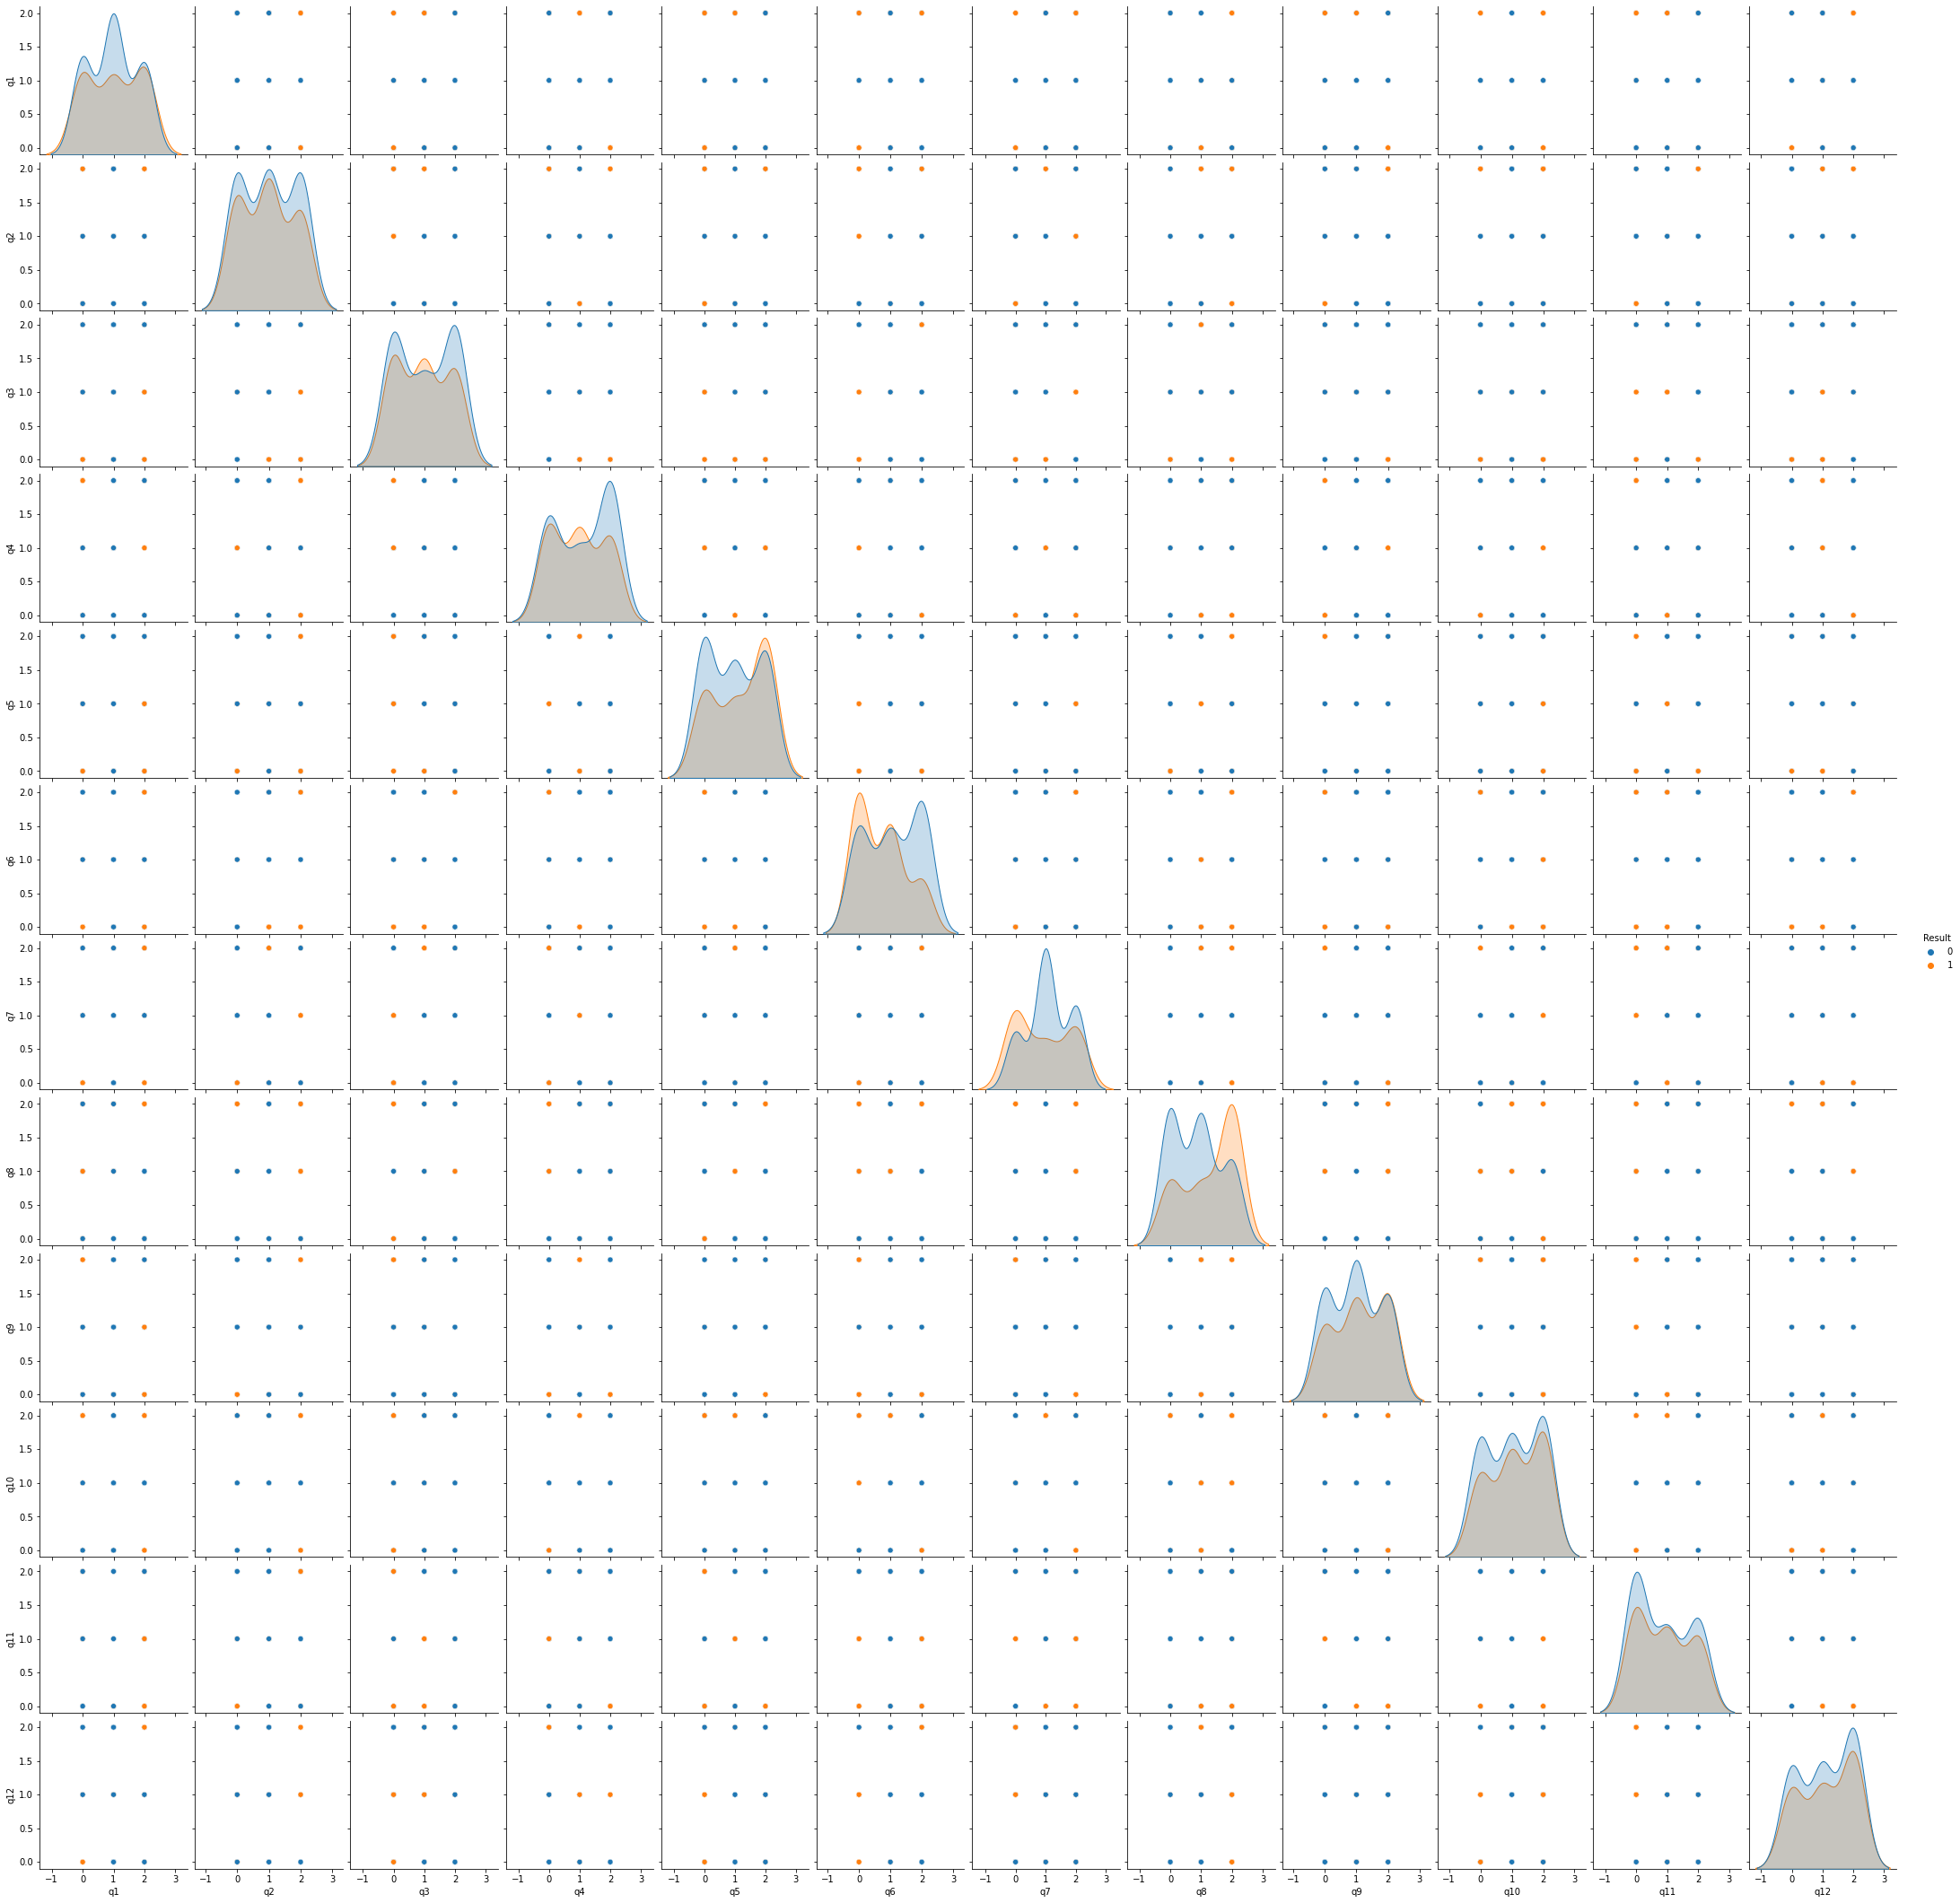

In [501]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(data, hue = 'Result',vars = ['q1', 'q2', 'q3', 'q4',
       'q5','q6','q7','q8','q9','q10','q11','q12'] )

In [502]:
data['Result'].value_counts()

0    54
1    45
Name: Result, dtype: int64

/home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

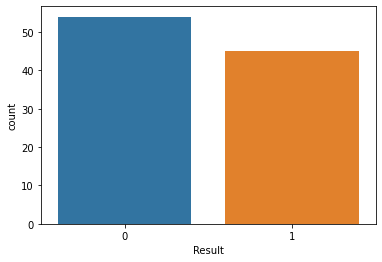

In [503]:
sns.countplot(data['Result'], label = "Count") 

<AxesSubplot:>

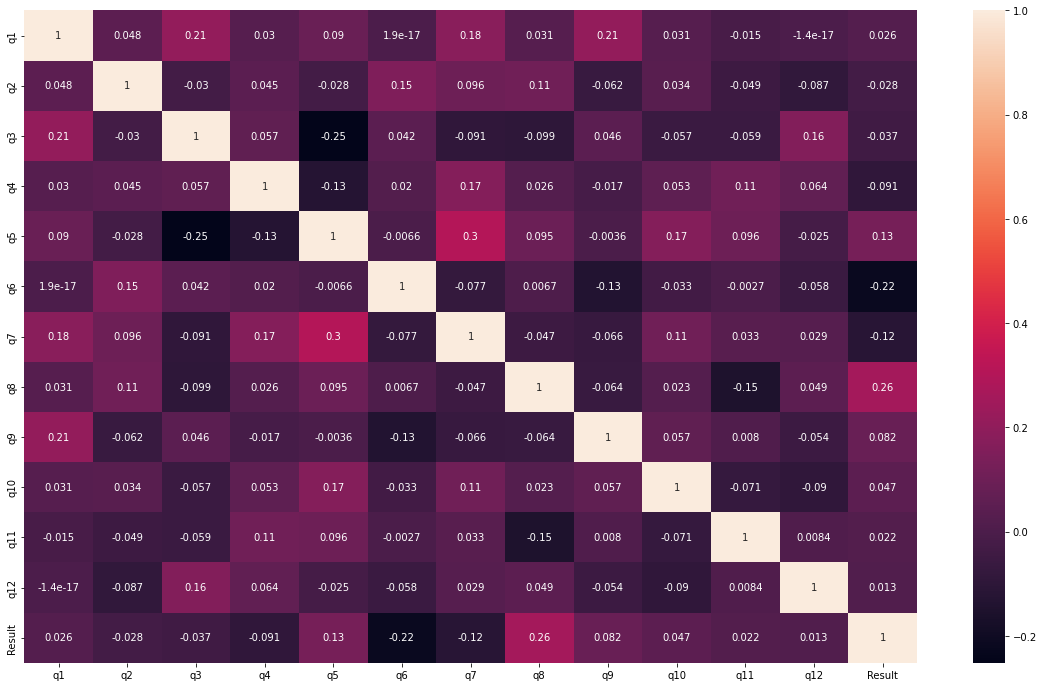

In [504]:
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True) 

In [505]:
X = data.drop(['first_name','Result'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,2,1,2,0,2,0,0,2,1,0,1,2
1,0,2,0,2,0,2,0,2,1,0,1,2
2,0,2,2,1,2,2,0,2,1,2,0,2
3,1,0,2,2,0,2,0,1,1,2,1,0
4,0,0,0,2,1,2,1,1,0,0,0,2


In [506]:
y = data['Result']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Result, dtype: int64

In [507]:
from sklearn.model_selection import train_test_split

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 65)

In [509]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (89, 12)


The size of our testing "X" (input features) is (10, 12)


The size of our training "y" (output feature) is (89,)


The size of our testing "y" (output features) is (10,)


In [510]:
from sklearn.svm import SVC

In [511]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [512]:
# svc_model.fit(X_train, y_train)

In [513]:
y_predict = svc_model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [514]:
data1= pd.read_csv('input.csv')
data1 = data1.astype(float)
svc_model.predict(data1)

array([1])

In [491]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [492]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Depressed', 'is_healthy'],
                         columns=['predicted_depressed','predicted_healthy'])
confusion

,predicted_depressed,predicted_healthy
Depressed,0,78
is_healthy,1,21


<AxesSubplot:>

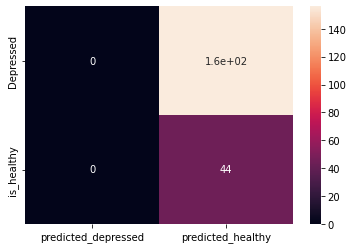

In [396]:
sns.heatmap(confusion, annot=True)

In [397]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        44
           1       0.00      0.00      0.00       156

    accuracy                           0.22       200
   macro avg       0.11      0.50      0.18       200
weighted avg       0.05      0.22      0.08       200



/home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [398]:
X_train_min = X_train.min()
X_train_min

q1     0
q2     0
q3     0
q4     0
q5     0
q6     0
q7     0
q8     0
q9     0
q10    0
q11    0
q12    0
dtype: int64

In [399]:
X_train_max = X_train.max()
X_train_max

q1     2
q2     2
q3     2
q4     2
q5     2
q6     2
q7     2
q8     2
q9     2
q10    2
q11    2
q12    2
dtype: int64

In [400]:
X_train_range = (X_train_max- X_train_min)
X_train_range

q1     2
q2     2
q3     2
q4     2
q5     2
q6     2
q7     2
q8     2
q9     2
q10    2
q11    2
q12    2
dtype: int64

In [401]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
504,0.0,0.0,1.0,0.5,0.0,1.0,1.0,0.5,0.5,0.0,0.0,0.5
839,0.0,1.0,0.0,0.0,1.0,1.0,0.5,0.0,0.5,0.0,0.0,1.0
141,1.0,1.0,0.5,0.5,1.0,1.0,0.5,1.0,0.5,1.0,0.5,0.0
825,0.5,0.0,0.0,1.0,0.0,1.0,0.5,1.0,1.0,0.0,1.0,0.0
470,0.0,0.0,1.0,0.5,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.5


In [402]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [403]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [404]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

In [405]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_depressed', 'is_healthy'],
                         columns=['predicted_depression','predicted_healthy'])
confusion

,predicted_depression,predicted_healthy
is_depressed,152,4
is_healthy,25,19


<AxesSubplot:>

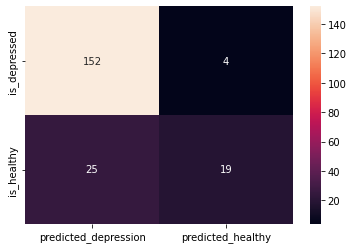

In [406]:
sns.heatmap(confusion,annot=True,fmt="d")

In [407]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.43      0.57        44
           1       0.86      0.97      0.91       156

    accuracy                           0.85       200
   macro avg       0.84      0.70      0.74       200
weighted avg       0.85      0.85      0.84       200



In [408]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [409]:
from sklearn.model_selection import GridSearchCV


In [410]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [411]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [412]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, gamma=0.1)


In [413]:
grid_predictions = grid.predict(X_test_scaled)

In [414]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_depressed', 'is_healthy'],
                         columns=['predicted_depressed','predicted_healthy'])
confusion

,predicted_depressed,predicted_healthy
is_depressed,152,4
is_healthy,15,29


<AxesSubplot:>

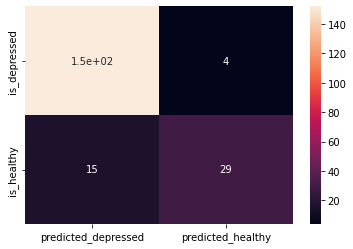

In [415]:
sns.heatmap(confusion, annot=True)

In [416]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        44
           1       0.91      0.97      0.94       156

    accuracy                           0.91       200
   macro avg       0.89      0.82      0.85       200
weighted avg       0.90      0.91      0.90       200



In [417]:
data.to_csv('perfect_dep.csv') 

In [418]:
import pickle
pickle.dump(grid, open('test.pkl','wb'))

In [419]:
data1= pd.read_csv('input.csv')
data1 = data1.astype(float)
svc_model.predict(data1)

array([1])